In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ompy as om
import logging

import scipy as sp
#%matplotlib widget
from ipywidgets import widgets #interact, interactive, fixed, interact_manual

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [2]:
om.__full_version__;

In [3]:
# For reproducability we seed the random generator.
# Note that by default several other classes in ompy, such as all
# classes with multinest calculations have a default seed, too
np.random.seed(1382398)

In [4]:
# get smaller files for the online version
plt.rcParams["figure.dpi"] = 70

In [5]:
# Import raw matrix into instance of om.Matrix()
e_de_U233 = om.Matrix(path="matrices/e_de_U233")
nai_e_U233 = e_de = om.Matrix(path="matrices/nai_e_U233")
nai_e_t_c_U233 = e_de = om.Matrix(path="matrices/nai_e_t_c_U233")


e_de_Pb208 = om.Matrix(path="/home/tellefs/Documents/master/master_calibration/usersort_Pb208/e_de_Pb208")
nai_e_Pb208 = om.Matrix(path="/home/tellefs/Documents/master/master_calibration/usersort_Pb208/nai_e_nogate")
nai_e_t_c_Pb208 = om.Matrix(path="/home/tellefs/Documents/master/master_calibration/usersort_Pb208/nai_e_t_c_Pb208")


#NaI calibration matrixes
nai_e_Pb208_tritiumgate_precal = om.Matrix(path="/home/tellefs/Documents/master/master_calibration/usersort_Pb208/nai_e_Pb208_tritiumgate_precal")
nai_e_Pb208_tritiumgate_cal = om.Matrix(path="/home/tellefs/Documents/master/master_calibration/usersort_Pb208/nai_e_Pb208_tritiumgate_cal")
nai_e_Pb208_alphagate_precal = om.Matrix(path="/home/tellefs/Documents/master/master_calibration/usersort_Pb208/nai_e_Pb208_alphagate_precal")
nai_e_Pb208_alphagate_cal = om.Matrix(path="/home/tellefs/Documents/master/master_calibration/usersort_Pb208/nai_e_Pb208_alphagate_cal")
nai_e_Pb208_nogate_precal = om.Matrix(path="/home/tellefs/Documents/master/master_calibration/usersort_Pb208/nai_e_Pb208_nogate_precal")
nai_e_Pb208_nogate_cal = om.Matrix(path="/home/tellefs/Documents/master/master_calibration/usersort_Pb208/nai_e_Pb208_nogate_cal")
nai_e_Pb208_tritiumgate_precal_gain1 = om.Matrix(path="/home/tellefs/Documents/master/master_calibration/usersort_Pb208/nai_e_Pb208_tritiumgate_nocal_NaIgain1")
nai_e_Pb208_alphagate_precal_gain1 = om.Matrix(path="/home/tellefs/Documents/master/master_calibration/usersort_Pb208/nai_e_Pb208_alphagate_nocal_NaIgain1")

In [6]:
def import_Qkinz(filename, particle):
    """
    'particle' has to be either 'triton', 'alpha', 'deutron' or 'proton' og 'helium3'
    energystate' is the excited state. 0 is the first, etc
    """
    excitation_energy = []
    E_dE = []
    dE_dE = []
    E_E = []
    dE_E = []
    total_particle_E = []

    start = False
    infile = open(filename, 'r', encoding='utf-8-sig')
    for line in infile:
        if  line.startswith('Ex(e+de)') and start==True:
            break
        if line.startswith('Excitation') or line.startswith('\n') or line.startswith('chi') or line.startswith('Ex(e+de)'):
            continue
        if line.startswith('Tritons:') and particle=='triton':
            start = True
            continue
        if line.startswith('Alphas:') and particle=='alpha':
            start = True
            continue
        if line.startswith('Protons:') and particle=='proton':
            start = True
            continue
        if line.startswith('Deutrons:') and particle=='deutron':
            start = True
            continue
        if line.startswith('Helium-3:') and particle=='helium3':
            start = True
            continue
        if start==True:
            values = line.split()
            for i in range(len(values)):
                values[i] = values[i].replace(',','.')
            excitation_energy.append(float(values[0])*1e-3)
            E_dE.append(float(values[1])*1e-3)
            dE_dE.append(float(values[3])*1e-3)
            E_E.append(float(values[4])*1e-3)
            dE_E.append(float(values[6])*1e-3)
            total_particle_E.append(float(values[7])*1e-3)
            continue
    infile.close()
    return excitation_energy, E_dE, dE_dE, E_E, dE_E, total_particle_E

In [7]:
#read values from qkinz bananas
Ex_U233_alphas, E_dE_U233_alphas, dE_dE_U233_alphas, E_E_U233_alphas, dE_E_U233_alphas, total_E_U233_alphas = import_Qkinz('U233_qkinz_bananas.txt', 'alpha')
Ex_U233_protons, E_dE_U233_protons, dE_dE_U233_protons, E_E_U233_protons, dE_E_U233_protons, total_E_U233_protons = import_Qkinz('U233_qkinz_bananas.txt', 'proton')
Ex_U233_deutrons, E_dE_U233_deutrons, dE_dE_U233_deutrons, E_E_U233_deutrons, dE_E_U233_deutrons, total_E_U233_deutrons = import_Qkinz('U233_qkinz_bananas.txt', 'deutron')
Ex_U233_tritons, E_dE_U233_tritons, dE_dE_U233_tritons, E_E_U233_tritons, dE_E_U233_tritons, total_E_U233_tritons = import_Qkinz('U233_qkinz_bananas.txt', 'triton')

Ex_Pb208_alphas, E_dE_Pb208_alphas, dE_dE_Pb208_alphas, E_E_Pb208_alphas, dE_E_Pb208_alphas, total_E_Pb208_alphas = import_Qkinz('Pb208_qkinz_bananas.txt', 'alpha')
Ex_Pb208_protons, E_dE_Pb208_protons, dE_dE_Pb208_protons, E_E_Pb208_protons, dE_E_Pb208_protons, total_E_Pb208_protons = import_Qkinz('Pb208_qkinz_bananas.txt', 'proton')
Ex_Pb208_deutrons, E_dE_Pb208_deutrons, dE_dE_Pb208_deutrons, E_E_Pb208_deutrons, dE_E_Pb208_eutrons, total_E_Pb208_deutrons = import_Qkinz('Pb208_qkinz_bananas.txt', 'deutron')
Ex_Pb208_tritons, E_dE_Pb208_tritons, dE_dE_Pb208_tritons, E_E_Pb208_tritons, dE_E_Pb208_tritons, total_E_Pb208_tritons = import_Qkinz('Pb208_qkinz_bananas.txt', 'triton')

In [8]:
major_tick_length=12
minor_tick_length=5
tick_width=2
tick_labelsize=25
label_fontsize=25
title_fontsize=25
figwidth=10
figheigth=8
save_dpi = 100


def plot_3D(matrix, filename, xlabel='xlabel', ylabel='ylabel'):
    fig, ax = plt.subplots(figsize=(figwidth, figheigth))
    matrix.plot(ax=ax);
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(axis='both', which='both', labelsize=tick_labelsize, width=tick_width)
    ax.tick_params(axis='both', which='major', length=major_tick_length)
    ax.tick_params(axis='both', which='minor', length=minor_tick_length)
    ax.set_xlabel(xlabel,fontsize=label_fontsize)
    ax.set_ylabel(ylabel,fontsize=label_fontsize)
    fig.axes[1].tick_params(labelsize=tick_labelsize)
    ax.grid(color='k', linestyle='--', linewidth=.5)
    fig.savefig(filename, dpi=save_dpi)
    
def plot_2D(matrix, filename, projection_axis, xlabel='xlabel', ylabel='ylabel', yscale='log'):
    fig, ax = plt.subplots(figsize=(figwidth, figheigth))
    matrix.plot_projection(projection_axis, kind="step", ax=ax);
    plt.yscale(yscale)
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(axis='both', which='both', labelsize=tick_labelsize, width=tick_width)
    ax.tick_params(axis='both', which='major', length=major_tick_length)
    ax.tick_params(axis='both', which='minor', length=minor_tick_length)
    ax.set_xlabel(xlabel,fontsize=label_fontsize)
    ax.set_ylabel(ylabel,fontsize=label_fontsize)
    ax.grid(color='k', linestyle='--', linewidth=.5)
    fig.savefig(filename, dpi=save_dpi)


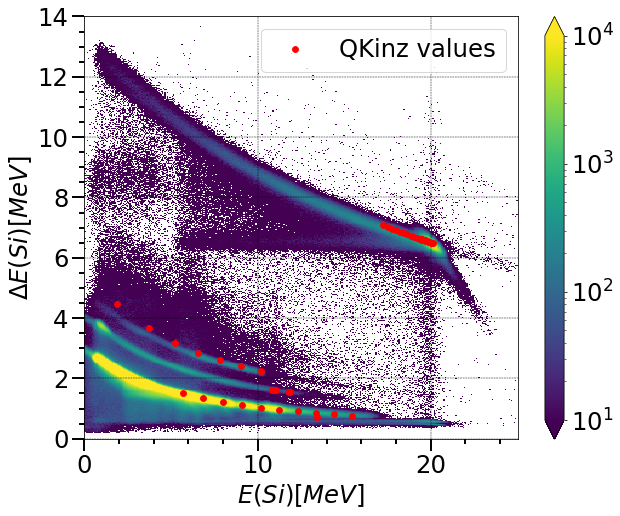

In [29]:
#plotting E_dE from U233
e_de_U233_plot = e_de_U233.copy()
e_de_U233_plot.cut('Ex', 0, 14000)
e_de_U233_plot.cut('Eg', 0, 25000)
e_de_U233_plot.Ex = e_de_U233_plot.Ex*1e-3
e_de_U233_plot.Eg = e_de_U233_plot.Eg*1e-3

fig, ax = plt.subplots(figsize=(figwidth, figheigth))
e_de_U233_plot.plot(ax=ax, vmin=1e1, vmax=1e4);
ax.plot(E_E_U233_alphas, E_dE_U233_alphas, 'o', color='red', label='QKinz values');
ax.legend(fontsize=label_fontsize, loc='upper right')
ax.plot(E_E_U233_protons, E_dE_U233_protons, 'o', color='red');
ax.plot(E_E_U233_tritons, E_dE_U233_tritons, 'o', color='red');
ax.plot(E_E_U233_deutrons, E_dE_U233_deutrons, 'o', color='red');
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis='both', which='both', labelsize=tick_labelsize, width=tick_width)
ax.tick_params(axis='both', which='major', length=major_tick_length)
ax.tick_params(axis='both', which='minor', length=minor_tick_length)
ax.set_xlabel('$E (Si) [MeV]$',fontsize=label_fontsize)
ax.set_ylabel('$\Delta E (Si) [MeV]$',fontsize=label_fontsize)
fig.axes[1].tick_params(labelsize=tick_labelsize)
ax.grid(color='k', linestyle='--', linewidth=.5)
fig.savefig('calibration_plots/U233_bananas_qkinz', dpi=save_dpi)




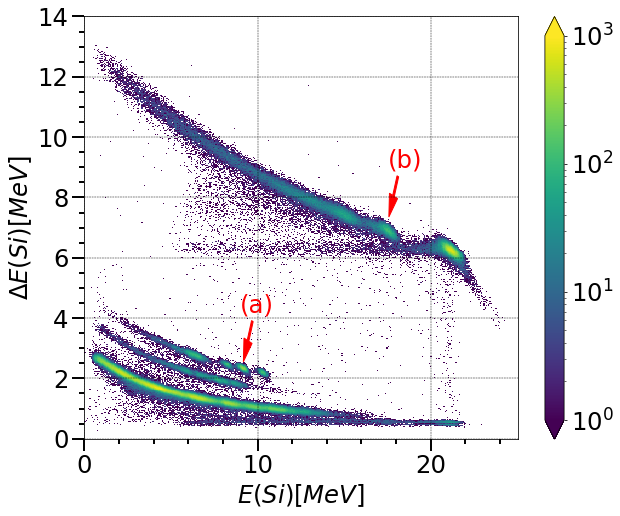

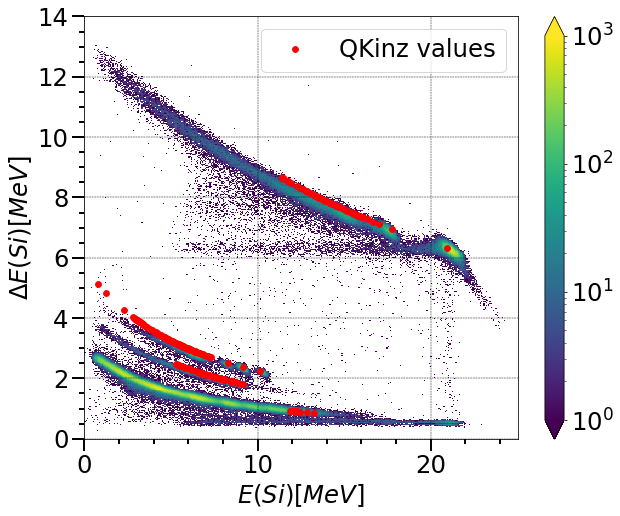

In [17]:
#plotting E_dE from Pb208
e_de_Pb208_plot = e_de_Pb208.copy()
e_de_Pb208_plot.cut('Ex', 0, 14000)
e_de_Pb208_plot.cut('Eg', 0, 25000)
e_de_Pb208_plot.Ex = e_de_Pb208_plot.Ex*1e-3
e_de_Pb208_plot.Eg = e_de_Pb208_plot.Eg*1e-3

#Plotting 208Pb banans, with arrows
fig, ax = plt.subplots(figsize=(figwidth, figheigth))
e_de_Pb208_plot.plot(ax=ax, vmin=1e0, vmax=1e3);
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis='both', which='both', labelsize=tick_labelsize, width=tick_width)
ax.tick_params(axis='both', which='major', length=major_tick_length)
ax.tick_params(axis='both', which='minor', length=minor_tick_length)
ax.text(9, 4.2, '(a)', color='red', fontsize=label_fontsize)
ax.text(17.5, 9, '(b)', color='red', fontsize=label_fontsize)
plt.arrow(x=9.7, y=3.9, dx=-.25, dy=-.65, width=.1, head_width=.5, color='r')
plt.arrow(x=18.1, y=8.7, dx=-.25, dy=-.65, width=.1, head_width=.5, color='r')
ax.set_xlabel('$E (Si) [MeV]$',fontsize=label_fontsize)
ax.set_ylabel('$\Delta E (Si) [MeV]$',fontsize=label_fontsize)
fig.axes[1].tick_params(labelsize=label_fontsize)
ax.grid(color='k', linestyle='--', linewidth=.5)
fig.savefig('calibration_plots/Pb208_bananas_arrows', dpi=save_dpi)


fig, ax = plt.subplots(figsize=(figwidth, figheigth))
e_de_Pb208_plot.plot(ax=ax, vmin=1e0, vmax=1e3);
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis='both', which='both', labelsize=tick_labelsize, width=tick_width)
ax.tick_params(axis='both', which='major', length=major_tick_length)
ax.tick_params(axis='both', which='minor', length=minor_tick_length)
ax.plot(E_E_Pb208_alphas, E_dE_Pb208_alphas, 'o', color='red', label='QKinz values');
ax.legend(fontsize=label_fontsize, loc='upper right')
ax.plot(E_E_Pb208_protons, E_dE_Pb208_protons, 'o', color='red');
ax.plot(E_E_Pb208_tritons, E_dE_Pb208_tritons, 'o', color='red');
ax.plot(E_E_Pb208_deutrons, E_dE_Pb208_deutrons, 'o', color='red');
ax.set_xlabel('$E (Si) [MeV]$',fontsize=label_fontsize)
ax.set_ylabel('$\Delta E (Si) [MeV]$',fontsize=label_fontsize)
fig.axes[1].tick_params(labelsize=label_fontsize)
ax.grid(color='k', linestyle='--', linewidth=.5)
fig.savefig('calibration_plots/Pb208_bananas_qkinz', dpi=save_dpi)

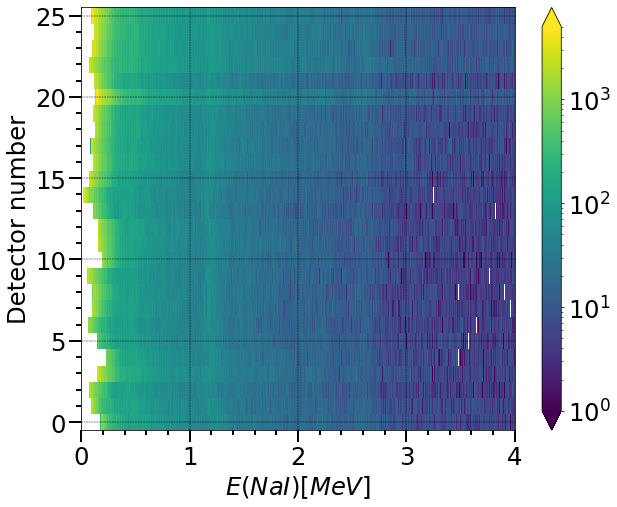

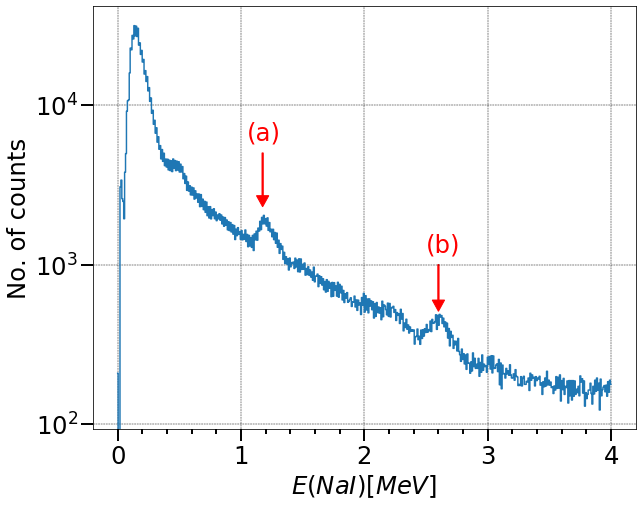

In [11]:
#Plotting e_nai from Pb208

nai_e_Pb208_plot_upper = nai_e_Pb208.copy()
nai_e_Pb208_plot_lower = nai_e_Pb208.copy()
nai_e_Pb208_plot = nai_e_Pb208.copy()

nai_e_Pb208_plot.cut('Ex', 0, 27)
nai_e_Pb208_plot.cut('Eg', 0, 4000)
nai_e_Pb208_plot.Eg = nai_e_Pb208_plot.Eg*1e-3
nai_e_Pb208_plot_lower.cut('Ex', 0, 7)
nai_e_Pb208_plot_upper.cut('Ex', 10, 27)
nai_e_Pb208_plot_lower.cut('Eg', 0, 4000)
nai_e_Pb208_plot_upper.cut('Eg', 0, 4000)
nai_e_Pb208_plot_lower.Eg = nai_e_Pb208_plot_lower.Eg*1e-3
nai_e_Pb208_plot_upper.Eg = nai_e_Pb208_plot_upper.Eg*1e-3
nai_e_Pb208_plot_upper.Ex = nai_e_Pb208_plot_upper.Ex-2

fig, ax = plt.subplots(figsize=(figwidth, figheigth));
nai_e_Pb208_plot_upper.plot(ax=ax, vmin=1, vmax=5000);
nai_e_Pb208_plot_lower.plot(ax=ax, vmin=1, vmax=5000, add_cbar=False);
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis='both', which='both', labelsize=tick_labelsize, width=tick_width)
ax.tick_params(axis='both', which='major', length=major_tick_length)
ax.tick_params(axis='both', which='minor', length=minor_tick_length)
ax.set_xlabel('$E (NaI) [MeV]$',fontsize=label_fontsize)
ax.set_ylabel('Detector number',fontsize=label_fontsize)
fig.axes[1].tick_params(labelsize=tick_labelsize)
ax.grid(color='k', linestyle='--', linewidth=.5)
fig.savefig('calibration_plots/Pb208_nai_e', dpi=save_dpi)





fig, ax = plt.subplots(figsize=(figwidth, figheigth))
nai_e_Pb208_plot.plot_projection('Eg', kind="step", ax=ax);
plt.arrow(x=1.175, y=5000, dx=0, dy=-2300, width=.01, head_width=.1, head_length = 400, color='r')
plt.arrow(x=2.6, y=1000, dx=-0, dy=-400, width=.01, head_width=.1, head_length = 90, color='r')
plt.yscale('log')
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis='both', which='both', labelsize=tick_labelsize, width=tick_width)
ax.tick_params(axis='both', which='major', length=major_tick_length)
ax.tick_params(axis='both', which='minor', length=minor_tick_length)
ax.set_xlabel('$E (NaI) [MeV]$',fontsize=label_fontsize)
ax.set_ylabel('No. of counts',fontsize=label_fontsize)
ax.grid(color='k', linestyle='--', linewidth=.5)
ax.text(1.05, 6e3, '(a)', color='red', fontsize=label_fontsize)
ax.text(2.5, 1.2e3, '(b)', color='red', fontsize=label_fontsize)
fig.savefig('calibration_plots/Pb208_nai_e_px', dpi=save_dpi)



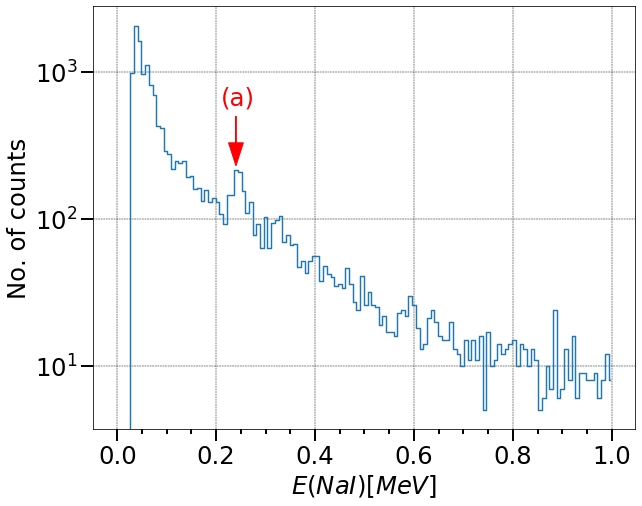

In [24]:
#Plotting e_nai from Pb208 (tritiumgate, pre-calibration)

nai_e_Pb208_tritiumgate_precal_gain1_plot = nai_e_Pb208_tritiumgate_precal_gain1.copy()
nai_e_Pb208_tritiumgate_precal_gain1_plot.cut('Ex', 0, 27)
nai_e_Pb208_tritiumgate_precal_gain1_plot.cut('Eg', 0, 1000)
nai_e_Pb208_tritiumgate_precal_gain1_plot.Eg = nai_e_Pb208_tritiumgate_precal_gain1_plot.Eg*1e-3

fig, ax = plt.subplots(figsize=(figwidth, figheigth))
nai_e_Pb208_tritiumgate_precal_gain1_plot.plot_projection('Eg', kind="step", ax=ax);
plt.arrow(x=0.24, y=500, dx=0, dy=-170, width=.001, head_width=.03, head_length = 100, color='r')
plt.yscale('log')
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis='both', which='both', labelsize=tick_labelsize, width=tick_width)
ax.tick_params(axis='both', which='major', length=major_tick_length)
ax.tick_params(axis='both', which='minor', length=minor_tick_length)
ax.set_xlabel('$E (NaI) [MeV]$',fontsize=label_fontsize)
ax.set_ylabel('No. of counts',fontsize=label_fontsize)
ax.grid(color='k', linestyle='--', linewidth=.5)
ax.text(0.21, 6e2, '(a)', color='red', fontsize=label_fontsize)
fig.savefig('calibration_plots/Pb208_nai_e_px_tritiumgate_precal', dpi=save_dpi)

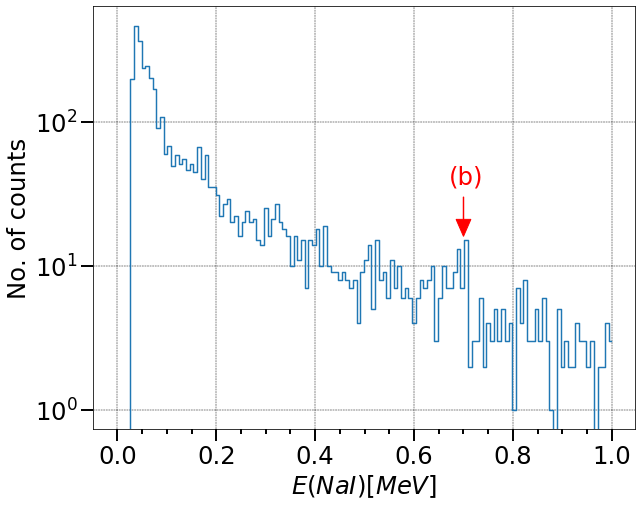

In [28]:
#Plotting e_nai from Pb208 (alphagate, pre-calibration)

nai_e_Pb208_alphagate_precal_gain1_plot = nai_e_Pb208_alphagate_precal_gain1.copy()
nai_e_Pb208_alphagate_precal_gain1_plot.cut('Ex', 0, 27)
nai_e_Pb208_alphagate_precal_gain1_plot.cut('Eg', 0, 1000)
nai_e_Pb208_alphagate_precal_gain1_plot.Eg = nai_e_Pb208_alphagate_precal_gain1_plot.Eg*1e-3

fig, ax = plt.subplots(figsize=(figwidth, figheigth))
nai_e_Pb208_alphagate_precal_gain1_plot.plot_projection('Eg', kind="step", ax=ax);
plt.arrow(x=0.7, y=30, dx=0, dy=-9, width=.001, head_width=.03, head_length = 5, color='r')
plt.yscale('log')
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis='both', which='both', labelsize=tick_labelsize, width=tick_width)
ax.tick_params(axis='both', which='major', length=major_tick_length)
ax.tick_params(axis='both', which='minor', length=minor_tick_length)
ax.set_xlabel('$E (NaI) [MeV]$',fontsize=label_fontsize)
ax.set_ylabel('No. of counts',fontsize=label_fontsize)
ax.grid(color='k', linestyle='--', linewidth=.5)
ax.text(0.67, 3.7e1, '(b)', color='red', fontsize=label_fontsize)
fig.savefig('calibration_plots/Pb208_nai_e_px_alphagate_precal', dpi=save_dpi)

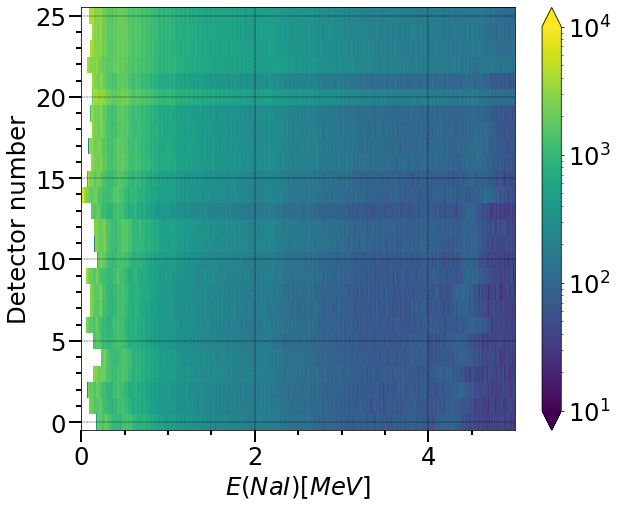

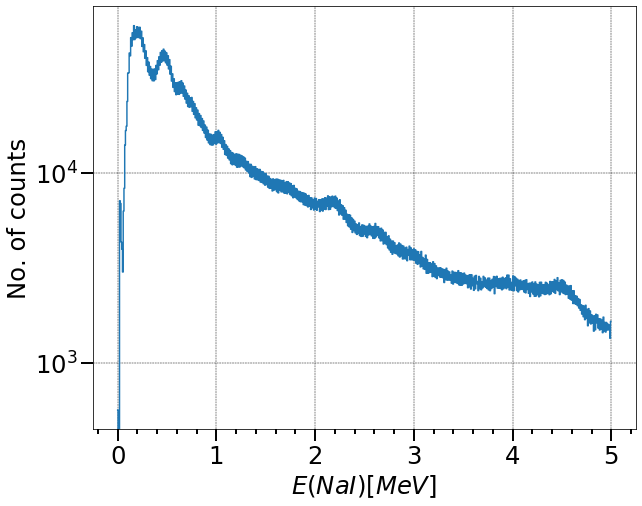

In [14]:
#Plotting e_nai from U233

nai_e_U233_plot = nai_e_U233.copy()
nai_e_U233_plot.cut('Ex', 0, 27)
nai_e_U233_plot.cut('Eg', 0, 5000)
nai_e_U233_plot.Eg = nai_e_U233_plot.Eg*1e-3

#plot_3D(nai_e_U233_plot, 'calibration_plots/U233_nai_e', xlabel='$E (NaI) [MeV]$', ylabel='Detector number')

nai_e_U233_plot_upper = nai_e_U233.copy()
nai_e_U233_plot_lower = nai_e_U233.copy()

nai_e_U233_plot_lower.cut('Ex', 0, 7)
nai_e_U233_plot_upper.cut('Ex', 10, 27)
nai_e_U233_plot_lower.cut('Eg', 0, 5000)
nai_e_U233_plot_upper.cut('Eg', 0, 5000)
nai_e_U233_plot_lower.Eg = nai_e_U233_plot_lower.Eg*1e-3
nai_e_U233_plot_upper.Eg = nai_e_U233_plot_upper.Eg*1e-3
nai_e_U233_plot_upper.Ex = nai_e_U233_plot_upper.Ex-2

fig, ax = plt.subplots(figsize=(figwidth, figheigth));
nai_e_U233_plot_upper.plot(ax=ax, vmin=1e1, vmax=1e4);
nai_e_U233_plot_lower.plot(ax=ax, add_cbar=False, vmin=1e1, vmax=1e4);
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis='both', which='both', labelsize=tick_labelsize, width=tick_width)
ax.tick_params(axis='both', which='major', length=major_tick_length)
ax.tick_params(axis='both', which='minor', length=minor_tick_length)
ax.set_xlabel('$E (NaI) [MeV]$',fontsize=label_fontsize)
ax.set_ylabel('Detector number',fontsize=label_fontsize)
fig.axes[1].tick_params(labelsize=tick_labelsize)
ax.grid(color='k', linestyle='--', linewidth=.5)
fig.savefig('calibration_plots/U233_nai_e', dpi=save_dpi)




plot_2D(nai_e_U233_plot, 'calibration_plots/U233_nai_e_px', 'Eg', xlabel='$E (NaI) [MeV]$', ylabel='No. of counts')


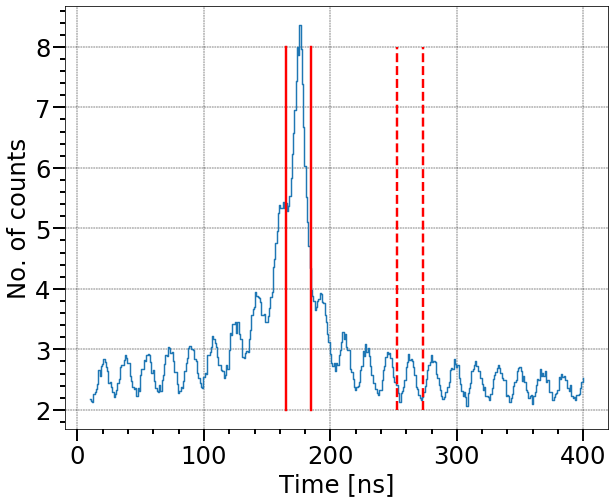

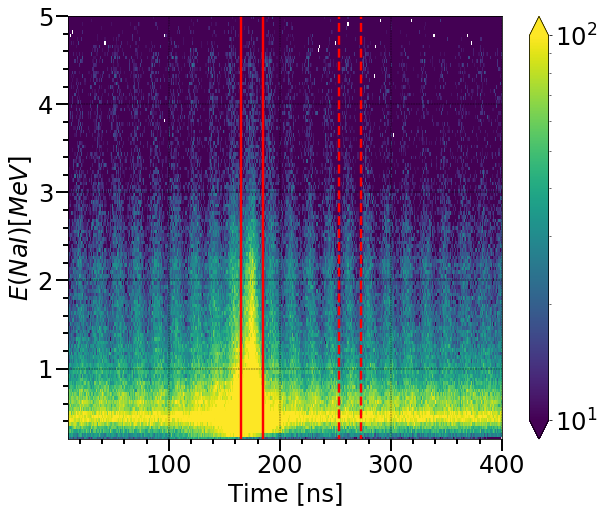

In [15]:
#Plotting nai_e_t_c_U233
nai_e_t_c_U233_plot = nai_e_t_c_U233.copy()
nai_e_t_c_U233_plot.cut('Ex', 10, 400)
nai_e_t_c_U233_plot.cut('Eg', 0, 5000)
nai_e_t_c_U233_plot.Eg = nai_e_t_c_U233_plot.Eg*1e-3
nai_e_t_c_U233_plot_copy = nai_e_t_c_U233_plot.copy()
nai_e_t_c_U233_plot_copy.values = nai_e_t_c_U233_plot_copy.values*1e-3

fig, ax = plt.subplots(figsize=(figwidth, figheigth))
nai_e_t_c_U233_plot_copy.plot_projection('Ex', kind="step", ax=ax);
ax.plot([165, 165], [2, 8], color='red', linewidth=2.5);
ax.plot([185, 185], [2, 8], color='red', linewidth=2.5);
ax.plot([253, 253], [2, 8], '--', color='red', linewidth=2.5);
ax.plot([273, 273], [2, 8], '--', color='red', linewidth=2.5);
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis='both', which='both', labelsize=tick_labelsize, width=tick_width)
ax.tick_params(axis='both', which='major', length=major_tick_length)
ax.tick_params(axis='both', which='minor', length=minor_tick_length)
ax.set_xlabel('Time [ns]',fontsize=label_fontsize)
ax.set_ylabel('No. of counts',fontsize=label_fontsize)
ax.grid(color='k', linestyle='--', linewidth=.5)
fig.savefig('calibration_plots/nai_e_t_c_U233_proj', dpi=save_dpi)

#need to also add plot of nai_e_t_c (timecuts with energy):

nai_e_t_c_U233_plot.values = np.rot90(nai_e_t_c_U233_plot.values)
nai_e_t_c_U233_plot.values = np.rot90(nai_e_t_c_U233_plot.values)
nai_e_t_c_U233_plot.values = np.rot90(nai_e_t_c_U233_plot.values)
nai_e_t_c_U233_plot.values = np.flip(nai_e_t_c_U233_plot.values, 1)



Eg_saved = nai_e_t_c_U233_plot.copy().Eg
nai_e_t_c_U233_plot.Eg = nai_e_t_c_U233_plot.copy().Ex
nai_e_t_c_U233_plot.Ex = Eg_saved

fig, ax = plt.subplots(figsize=(figwidth, figheigth))
nai_e_t_c_U233_plot.plot(ax=ax, vmin=1e1, vmax = 1e2);
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis='both', which='both', labelsize=tick_labelsize, width=tick_width)
ax.tick_params(axis='both', which='major', length=major_tick_length)
ax.tick_params(axis='both', which='minor', length=minor_tick_length)
ax.set_xlabel('Time [ns]',fontsize=label_fontsize)
ax.set_ylabel('$E (NaI) [MeV]$',fontsize=label_fontsize)
fig.axes[1].tick_params(labelsize=label_fontsize)
ax.grid(color='k', linestyle='--', linewidth=.5)
ax.plot([165, 165], [0, 5], color='red', linewidth=2.5);
ax.plot([185, 185], [0, 5], color='red', linewidth=2.5);
ax.plot([253, 253], [0, 5], '--', color='red', linewidth=2.5);
ax.plot([273, 273], [0, 5], '--', color='red', linewidth=2.5);
ax.set_ylim(0.2,5)

fig.savefig('calibration_plots/nai_e_t_c_U233', dpi=save_dpi)